In [28]:
using BasisMatrices
using PyPlot
using Plots

Figure 6.1

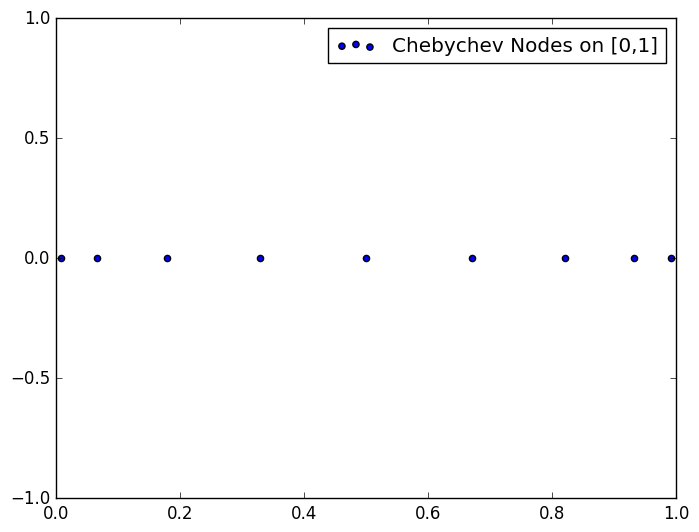

(-1,1)

In [4]:
a = 0
b = 1
n = 9
cnodes = zeros(n)
for i in 1:9
    cnodes[i]=(a+b)/2 + (b-a)/2 * cos(((n-i+0.5)/n)pi)
end
fig, ax = subplots()
y = zeros(n)
ax[:scatter](cnodes, y, label="Chebychev Nodes on [0,1]")
ax[:legend]()
ax[:set_xlim]([0,1]) 
ax[:set_ylim]([-1,1]) 

Figure 6.2（の一部）

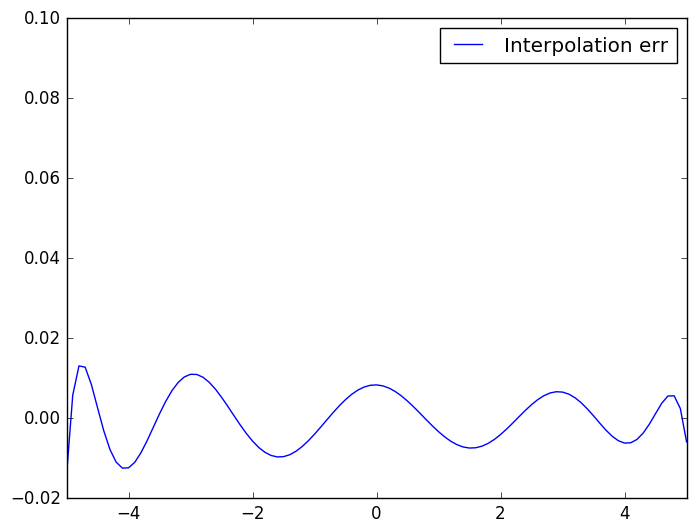

(-0.02,0.1)

In [13]:
fig2(x) = exp(-x)
n = 10
a, b = -5, 5
x=collect(linspace(a,b,101))

basis = Basis(ChebParams(n,a,b))
xgrid = collect(linspace(a, b, 101))
S, (xgrid,) = nodes(basis)
Φ = BasisMatrix(basis, Expanded(), S, 0)
y = fig2(S)
c = Φ.vals[1] \ y;
interp = funeval(c, basis, x);
err = interp-fig2(x)

fig, ax = subplots()
ax[:plot](x ,err, label = "Interpolation err")
ax[:legend]()
ax[:set_xlim]((-5,5))
ax[:set_ylim]((-0.02, 0.1))

Figure 6.3

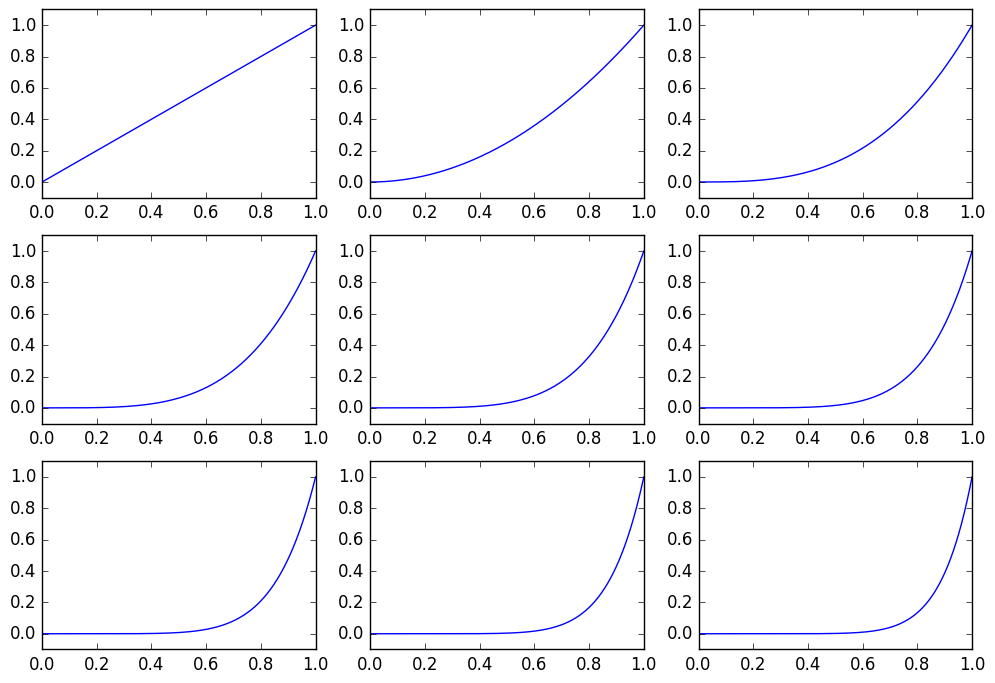

In [14]:
a, b = 0,1
num_rows, num_cols = 3, 3
plot_n = 0
x = linspace(a,b,1001)
fig, axes = subplots(num_rows, num_cols,figsize=(12, 8))
for i in 1:num_rows
    for j in 1:num_cols
        plot_n += 1
        ax = axes[i, j]
        y = x.^(plot_n)
        ax[:plot](x,y)
        ax[:set_ylim]([-0.1, 1.1]) 
    end
end

Figure 6.4

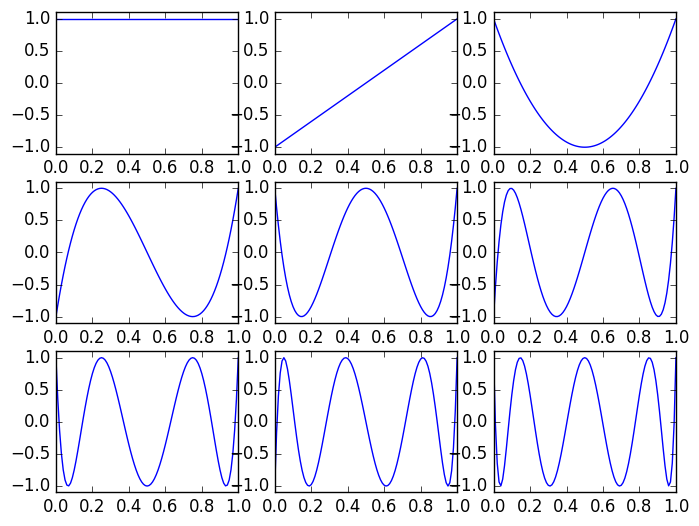

In [15]:
n = 9
a, b = 0, 1
basis = Basis(ChebParams(n, a, b))
xgrid = collect(linspace(a, b, 101))

plot_n = 0
fig, axes = subplots(3,3)
for i in 1:3
    for j in 1:3
        ax = axes[i,j]
        c = zeros(n)
        plot_n +=1
        c[plot_n]=1
        y = funeval(c,basis,xgrid)
        ax[:plot](xgrid ,y)
        ax[:legend]()
        ax[:set_ylim]((-1.1, 1.1))
    end
end

Figure 6.5

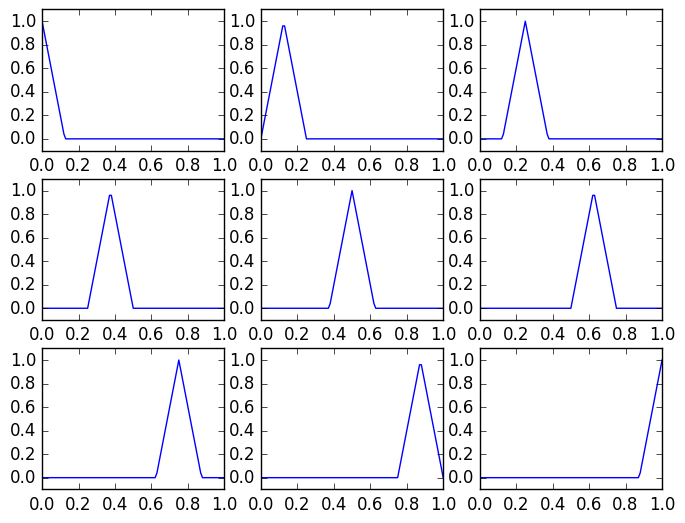

In [17]:
n = 9
a, b = 0, 1
k = 1
basis = Basis(SplineParams(n-(k-1), a, b, k))
xgrid = collect(linspace(a, b, 101))

plot_n = 0
fig, axes = subplots(3,3)
for i in 1:3
    for j in 1:3
        ax = axes[i,j]
        c = zeros(n)
        plot_n +=1
        c[plot_n]=1
        y = funeval(c,basis,xgrid)
        ax[:plot](xgrid ,y)
        ax[:legend]()
        ax[:set_ylim]((-0.1, 1.1))
    end
end

Figure 6.6

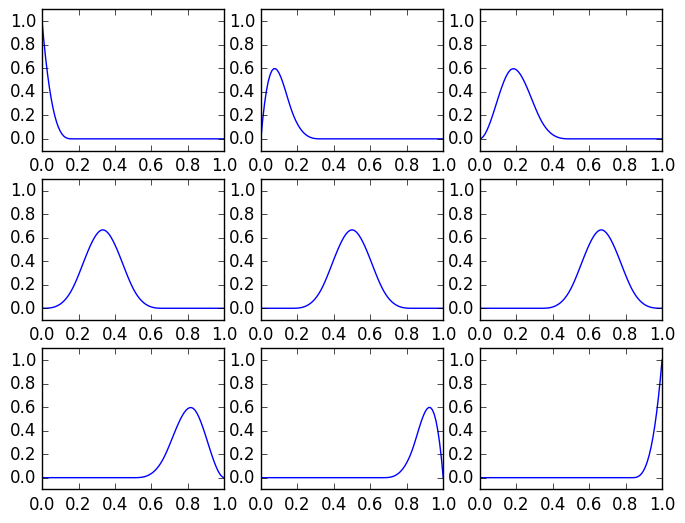

In [18]:
n = 9
a, b = 0, 1
k = 3
basis = Basis(SplineParams(n-(k-1), a, b, k))
xgrid = collect(linspace(a, b, 101))

plot_n = 0
fig, axes = subplots(3,3)
for i in 1:3
    for j in 1:3
        ax = axes[i,j]
        c = zeros(n)
        plot_n +=1
        c[plot_n]=1
        y = funeval(c,basis,xgrid)
        ax[:plot](xgrid ,y)
        ax[:legend]()
        ax[:set_ylim]((-0.1, 1.1))
    end
end

Figure 6.8

In [20]:
f1(x) = exp(x)
f2(x) = 1 ./(1+25x.^2)
f3(x) = sqrt(abs(x))

f3 (generic function with 1 method)

In [26]:
n = 7
f = f1
a = -1
b = 1
x = collect(linspace(a,b,101))

basis = Basis(ChebParams(n,a,b))
S, (xgrid,) = nodes(basis)
Φ = BasisMatrix(basis, Expanded(), S, 0)
y = f(S)
c = Φ.vals[1] \ y;
interp = funeval(c, basis, x);
ys = []
push!(ys, f(x))
push!(ys,interp)

2-element Array{Any,1}:
 [0.367879,0.375311,0.382893,0.390628,0.398519,0.40657,0.414783,0.423162,0.431711,0.440432  …  2.2705,2.31637,2.36316,2.4109,2.4596,2.50929,2.55998,2.6117,2.66446,2.71828]
 [0.367882,0.375312,0.382892,0.390626,0.398516,0.406567,0.41478,0.42316,0.431709,0.44043  …  2.2705,2.31637,2.36316,2.4109,2.45961,2.50929,2.55998,2.6117,2.66446,2.71828] 

In [27]:
for k in [3,1]
    basis = Basis(SplineParams(n - (k-1), a, b, k))
    S, (xgrid,) = nodes(basis)
    Φ = BasisMatrix(basis, Expanded(), S, 0)
    y = f(S)
    c = Φ.vals[1] \ y;
    interp = funeval(c, basis, x);
    push!(ys, interp)
end

[Plots.jl] Initializing backend: pyplot



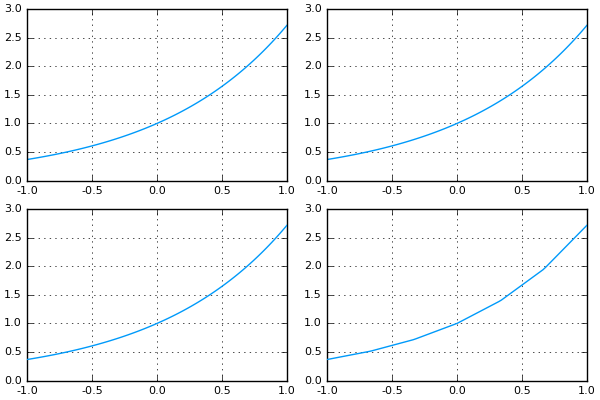

In [29]:
ylims = [0,3]
Plots.plot(x, ys, layout=4, ylims=ylims, leg=false)

Figure 6.9


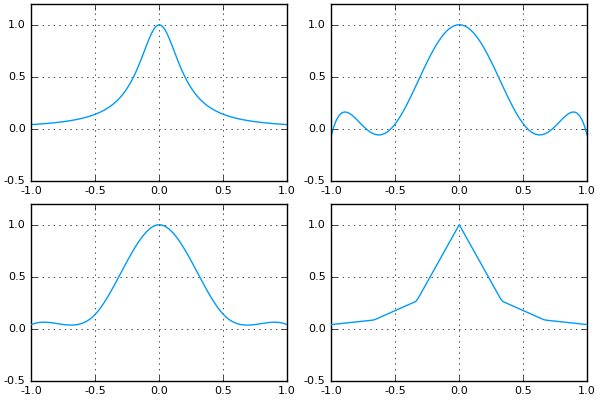

In [32]:
n = 7
f = f2
a = -1
b = 1
x = collect(linspace(a,b,101))

basis = Basis(ChebParams(n,a,b))
S, (xgrid,) = nodes(basis)
Φ = BasisMatrix(basis, Expanded(), S, 0)
y = f(S)
c = Φ.vals[1] \ y;
interp = funeval(c, basis, x);
ys = []
push!(ys, f(x))
push!(ys,interp)
for k in [3,1]
    basis = Basis(SplineParams(n - (k-1), a, b, k))
    S, (xgrid,) = nodes(basis)
    Φ = BasisMatrix(basis, Expanded(), S, 0)
    y = f(S)
    c = Φ.vals[1] \ y;
    interp = funeval(c, basis, x);
    push!(ys, interp)
end
ylims = [-0.5,1.2]
Plots.plot(x, ys, layout=4, ylims=ylims, leg=false)

Figure 6.10


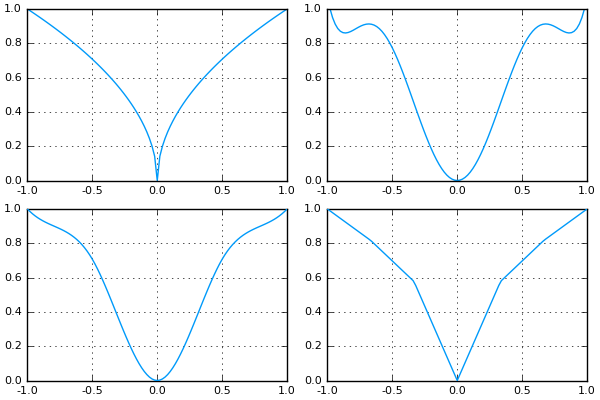

In [33]:
n = 7
f = f3
a = -1
b = 1
x = collect(linspace(a,b,101))

basis = Basis(ChebParams(n,a,b))
S, (xgrid,) = nodes(basis)
Φ = BasisMatrix(basis, Expanded(), S, 0)
y = f(S)
c = Φ.vals[1] \ y;
interp = funeval(c, basis, x);
ys = []
push!(ys, f(x))
push!(ys,interp)
for k in [3,1]
    basis = Basis(SplineParams(n - (k-1), a, b, k))
    S, (xgrid,) = nodes(basis)
    Φ = BasisMatrix(basis, Expanded(), S, 0)
    y = f(S)
    c = Φ.vals[1] \ y;
    interp = funeval(c, basis, x);
    push!(ys, interp)
end
ylims = [0,1]
Plots.plot(x, ys, layout=4, ylims=ylims, leg=false)

Figure 6.11


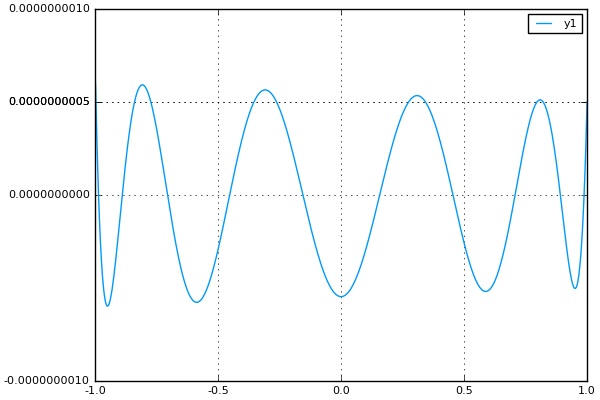

In [34]:
n=10
a=-1
b=1
x=collect(linspace(a,b,1001))
g(x,alpha) = exp(-alpha.*x)
alpha=1
basis = Basis(ChebParams(n,a,b))
S, (xgrid,)=nodes(basis)
Φ = BasisMatrix(basis, Expanded(), S, 0)
y=g(S,alpha)
c = Φ.vals[1] \ y;
interp = funeval(c, basis, x);
errors=-(interp-g(x,alpha))
yticks= [-1.0,0.5,0.0,0.5,1.0]*1e-9
Plots.plot(x,errors,yticks=yticks)